<a href="https://colab.research.google.com/github/prolificdee99/-rn-assignment7-11145530/blob/master/firstpandasprogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Create the dataset
data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005, 1006],
    'Customer': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Emma'],
    'Product': ['Laptop', 'Phone', 'Shoes', 'Headphones', 'Jacket', 'Book'],
    'Category': ['Electronics', 'Electronics', 'Fashion', 'Electronics', 'Fashion', 'Books'],
    'Quantity': [1, 2, 3, 1, 2, 4],
    'Price': [1200, 800, 60, 150, 90, 20],
    'OrderDate': pd.to_datetime(['2025-01-05','2025-01-07','2025-01-08','2025-01-10','2025-01-12','2025-01-15']),
    'City': ['London','Paris','Berlin','London','Madrid','Rome']
}

df = pd.DataFrame(data)

# Preview the dataset
print(df)


   OrderID Customer     Product     Category  Quantity  Price  OrderDate  \
0     1001    Alice      Laptop  Electronics         1   1200 2025-01-05   
1     1002      Bob       Phone  Electronics         2    800 2025-01-07   
2     1003  Charlie       Shoes      Fashion         3     60 2025-01-08   
3     1004    Alice  Headphones  Electronics         1    150 2025-01-10   
4     1005    David      Jacket      Fashion         2     90 2025-01-12   
5     1006     Emma        Book        Books         4     20 2025-01-15   

     City  
0  London  
1   Paris  
2  Berlin  
3  London  
4  Madrid  
5    Rome  


In [12]:
print(df.head())

   OrderID Customer     Product     Category  Quantity  Price  OrderDate  \
0     1001    Alice      Laptop  Electronics         1   1200 2025-01-05   
1     1002      Bob       Phone  Electronics         2    800 2025-01-07   
2     1003  Charlie       Shoes      Fashion         3     60 2025-01-08   
3     1004    Alice  Headphones  Electronics         1    150 2025-01-10   
4     1005    David      Jacket      Fashion         2     90 2025-01-12   

     City  
0  London  
1   Paris  
2  Berlin  
3  London  
4  Madrid  


In [13]:
print(df.OrderID)


0    1001
1    1002
2    1003
3    1004
4    1005
5    1006
Name: OrderID, dtype: int64


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    6 non-null      int64         
 1   Customer   6 non-null      object        
 2   Product    6 non-null      object        
 3   Category   6 non-null      object        
 4   Quantity   6 non-null      int64         
 5   Price      6 non-null      int64         
 6   OrderDate  6 non-null      datetime64[ns]
 7   City       6 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 516.0+ bytes
None


In [15]:
print(df.describe())

           OrderID  Quantity        Price            OrderDate
count     6.000000  6.000000     6.000000                    6
mean   1003.500000  2.166667   386.666667  2025-01-09 12:00:00
min    1001.000000  1.000000    20.000000  2025-01-05 00:00:00
25%    1002.250000  1.250000    67.500000  2025-01-07 06:00:00
50%    1003.500000  2.000000   120.000000  2025-01-09 00:00:00
75%    1004.750000  2.750000   637.500000  2025-01-11 12:00:00
max    1006.000000  4.000000  1200.000000  2025-01-15 00:00:00
std       1.870829  1.169045   493.463947                  NaN


In [16]:
df['Revenue'] = df['Quantity']*df['Price']
print(df[['OrderID','Product','Quantity','Price','Revenue']])

   OrderID     Product  Quantity  Price  Revenue
0     1001      Laptop         1   1200     1200
1     1002       Phone         2    800     1600
2     1003       Shoes         3     60      180
3     1004  Headphones         1    150      150
4     1005      Jacket         2     90      180
5     1006        Book         4     20       80


In [17]:
category_revenue = df.groupby('Category')['Revenue'].sum()
print(category_revenue)

Category
Books            80
Electronics    2950
Fashion         360
Name: Revenue, dtype: int64


In [19]:
product_sales = df.groupby('Product')['Quantity'].sum()
print(product_sales)

Product
Book          4
Headphones    1
Jacket        2
Laptop        1
Phone         2
Shoes         3
Name: Quantity, dtype: int64


In [21]:
top_product = product_sales.idxmin()

In [23]:
top_product = product_sales.idxmax()
top_product = product_sales.idxmax()
print(f"Top-Selling Product : {top_product} ({top_product} units)")

Top-Selling Product : Book (Book units)


OrderDate
2025-01-05    1200
2025-01-07    1600
2025-01-08     180
2025-01-10     150
2025-01-12     180
2025-01-15      80
Name: Revenue, dtype: int64


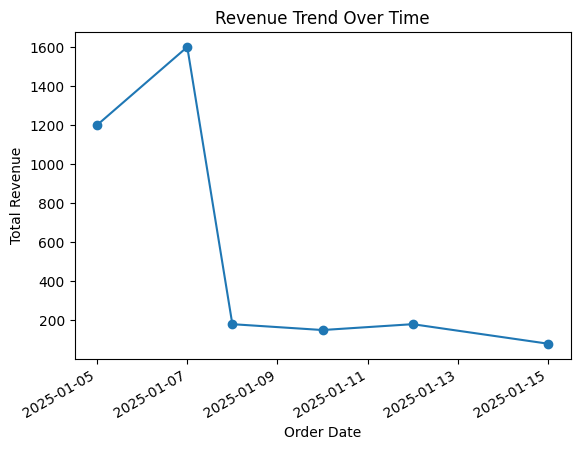

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
daily_revenue = df.groupby('OrderDate')['Revenue'].sum()
print(daily_revenue)
daily_revenue.plot(kind='line',marker='o',title='Revenue Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.show()

In [25]:
city_revenue = df.groupby('City')['Revenue'].sum()
print(city_revenue)

top_city = city_revenue.idxmax()
top_revenue = city_revenue.max()
print(f"City with the highest revenue : {top_city} (${top_revenue})")

City
Berlin     180
London    1350
Madrid     180
Paris     1600
Rome        80
Name: Revenue, dtype: int64
City with the highest revenue : Paris ($1600)


<function matplotlib.pyplot.show(close=None, block=None)>

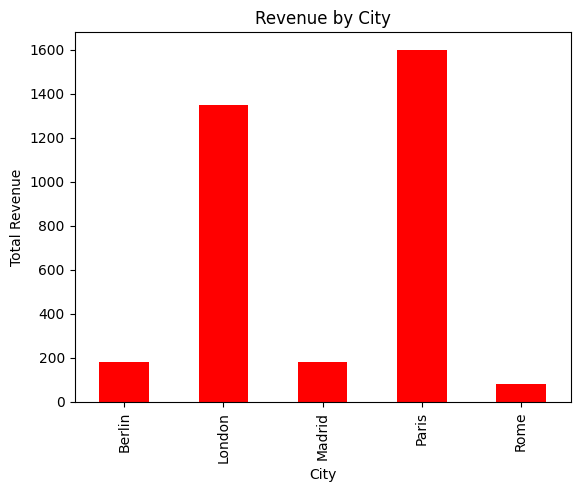

In [26]:
import matplotlib.pyplot as plt
city_revenue.plot(kind='bar',title='Revenue by City',color='red')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show